# Assignment 3 Part 1

### Machine Learning Lab ###

Name: Gourav Kumar Shaw

Enrollment Number: 2020CSB010

## Task 1
Download Titanic Dataset (https://www.kaggle.com/heptapod/titanic/version/1#) and do initial pre-processing and train a Logistic Regression for the classifier.

In [58]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from google.colab import drive

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd

FILE_PATH = "/content/drive/MyDrive/ML_DRIVE/Assign_3/train_and_test2.csv"

# reading the csv file
titanic_df = pd.read_csv(FILE_PATH).dropna()

titanic_df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [61]:
# finding columns
titanic_df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [62]:
# all the zero column are not useful (kaggle saying all zero)
# so ignoring them

# also dropping "Passengerid" cause using pandas internal
# 0-index id
cols_to_be_removed = ['Passengerid', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'zero.15', 'zero.16', 'zero.17', 'zero.18']
titanic_df = titanic_df.drop(cols_to_be_removed, axis=1)
titanic_df.info()
titanic_df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1307 non-null   float64
 1   Fare      1307 non-null   float64
 2   Sex       1307 non-null   int64  
 3   sibsp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Pclass    1307 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   2urvived  1307 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.9 KB


,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [63]:
# finding shape of the data
titanic_df.shape



(1307, 8)

In [64]:
titanic_df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


In [65]:
# Pclass has value ranging from 0 to 3 (doing OneHotEncoding)
# Embarked has value ranging from 0 to 3 (doing OneHotEncoding)

#One-hot encoding is a technique used to represent categorical data in a numerical format.
#Creating Binary Columns: One-hot encoding converts each category or label into a new binary column.
encoded_cols = ["Pclass", "Embarked"]
# pd.get_dummies() function from the pandas library to perform one-hot encoding on the specified columns
titanic_df = pd.get_dummies(titanic_df, columns=encoded_cols)
titanic_df.info()
titanic_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1307 non-null   float64
 1   Fare          1307 non-null   float64
 2   Sex           1307 non-null   int64  
 3   sibsp         1307 non-null   int64  
 4   Parch         1307 non-null   int64  
 5   2urvived      1307 non-null   int64  
 6   Pclass_1      1307 non-null   uint8  
 7   Pclass_2      1307 non-null   uint8  
 8   Pclass_3      1307 non-null   uint8  
 9   Embarked_0.0  1307 non-null   uint8  
 10  Embarked_1.0  1307 non-null   uint8  
 11  Embarked_2.0  1307 non-null   uint8  
dtypes: float64(2), int64(4), uint8(6)
memory usage: 79.1 KB


,Age,Fare,Sex,sibsp,Parch,2urvived,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,22.0,7.2500,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,1,1,0,1,1,0,0,1,0,0
2,26.0,7.9250,1,0,0,1,0,0,1,0,0,1
3,35.0,53.1000,1,1,0,1,1,0,0,0,0,1
4,35.0,8.0500,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,0,0,0,1,0,0,1
1305,39.0,108.9000,1,0,0,0,1,0,0,1,0,0
1306,38.5,7.2500,0,0,0,0,0,0,1,0,0,1
1307,28.0,8.0500,0,0,0,0,0,0,1,0,0,1


In [68]:
# Age and Fare needs to be standardized
# Standardization is a data preprocessing technique used in statistics and machine learning
# to transform numerical data so that it has a mean of 0 and a standard deviation of 1.
# Mean of 0: After standardization, the mean (average) of the variable becomes 0.
# This means that the values are shifted so that their center is at 0.
# Standard Deviation of 1: The standard deviation measures the spread or dispersion of the data. After standardization,
# the standard deviation of the variable becomes 1. This means that the data is scaled so that it has a consistent spread.

from sklearn.preprocessing import StandardScaler
# Define the standardize function: This function takes two parameters:

    # df: The Pandas DataFrame that contains the data you want to standardize.
    # col_name: A string specifying the name of the column in the DataFrame that you want to standardize.

def standardize(df: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
    scaler = StandardScaler()

    df[[col_name]] = pd.DataFrame(
        data=scaler.fit_transform(df[[col_name]]),
        index=df.index,
        columns=[col_name]
    )
    return df




In [69]:
columns_to_standardize = ['Age', "Fare", 'sibsp', "Parch"]

for column in columns_to_standardize:
    titanic_df = standardize(titanic_df, column)

titanic_df

,Age,Fare,Sex,sibsp,Parch,2urvived,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0
0,-0.580261,-0.501839,0,0.480272,-0.445407,0,0,0,1,0,0,1
1,0.662297,0.736023,1,0.480272,-0.445407,1,1,0,0,1,0,0
2,-0.269621,-0.488790,1,-0.479537,-0.445407,1,0,0,1,0,0,1
3,0.429318,0.384512,1,0.480272,-0.445407,1,1,0,0,0,0,1
4,0.429318,-0.486373,0,-0.479537,-0.445407,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,-0.114301,-0.486373,0,-0.479537,-0.445407,0,0,0,1,0,0,1
1305,0.739957,1.463211,1,-0.479537,-0.445407,0,1,0,0,1,0,0
1306,0.701127,-0.501839,0,-0.479537,-0.445407,0,0,0,1,0,0,1
1307,-0.114301,-0.486373,0,-0.479537,-0.445407,0,0,0,1,0,0,1


In [73]:
X = titanic_df.drop('2urvived', axis=1)
y = titanic_df['2urvived']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
print(f"Train Dataset Shape: X_train = {X_train.shape} y_train = {y_train.shape}")

Train Dataset Shape: X_train = (980, 11) y_train = (980,)


In [76]:
print(f"Test Dataset Shape: X_test = {X_test.shape} y_test = {y_test.shape}")

Test Dataset Shape: X_test = (327, 11) y_test = (327,)


In [79]:
# make, train, and score the model
# from sklearn.linear_model import LogisticRegression

# Logistic regression is a supervised learning algorithm used for binary and multiclass classification tasks.
model = LogisticRegression().fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"accuracy = {accuracy}")

accuracy = 0.7767584097859327



# Task 2


Analyze and control the overfitting by varying the inverse of regularization strength parameter (0.1, 0.25,0.5, 0.75, 0.9) and plot the accuracy graph for the test set.

In [83]:
# def train_model_with_inv_regu(X_train, y_train, X_test, y_test, C=1.0):
# This line defines a function called train_model_with_inv_regu that takes five arguments:
# X_train: The training feature matrix (input data) for the logistic regression model.
# y_train: The training target labels or classes for the logistic regression model.
# X_test: The testing feature matrix (input data) to evaluate the model's performance.
# y_test: The testing target labels or classes to evaluate the model's performance.
# C: The regularization strength hyperparameter for logistic regression. It is set to 1.0
#  by default but can be adjusted when calling the function.

def train_model_with_inv_regu(X_train, y_train, X_test, y_test, C=1.0):
  lr = LogisticRegression(max_iter = 10000, C=C)
  lr.fit(X_train, y_train)
  return lr.score(X_test, y_test)

In [ ]:
# lr = LogisticRegression(max_iter=10000, C=C):
# This line creates an instance of the logistic regression model (LogisticRegression) with the following parameters:
# max_iter=10000: This sets the maximum number of iterations for the optimization algorithm. In this case,
# it's set to a high value (10,000) to ensure that the optimization converges if needed.
# C=C: This parameter controls the regularization strength. A smaller C value corresponds to stronger regularization,
# and a larger C value corresponds to weaker regularization.
# The C parameter is passed to the constructor with the value provided when calling the function.

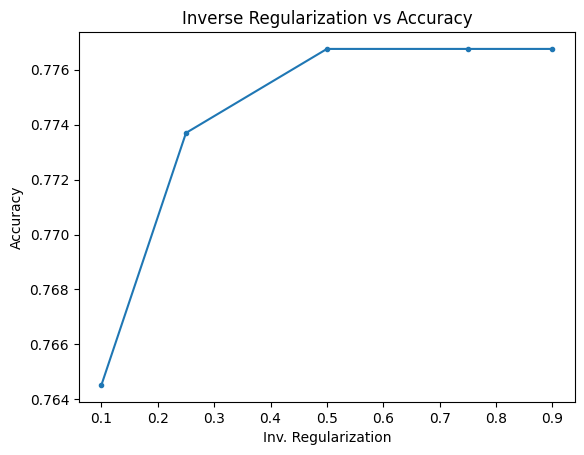

In [82]:
inv_reg = [0.1, 0.25, 0.5, 0.75, 0.9]
accuracy = []

for ir in inv_reg:
  accuracy.append(train_model_with_inv_regu(X_train, y_train, X_test, y_test, ir))

plt.plot(inv_reg, accuracy, '.-')
plt.title("Inverse Regularization vs Accuracy")
plt.xlabel("Inv. Regularization")
plt.ylabel("Accuracy")
plt.show()


## Task 3
Using the same dataset train a Decision Tree classifier and vary the maximum depth of the tree to train at least 5 classifiers to analyze the effectiveness.

In [84]:
from sklearn.tree import DecisionTreeClassifier


def classifierHelper(
    X_train,
    y_train,
    X_test,
    y_test,
    max_depth
):
# max_depth: The maximum depth of the decision tree, which is a hyperparameter to control the complexity of the tree
# max_depths: It's created using the range function to generate a sequence of integers from 1 to max_depth.
# This sequence represents the different values of max_depth that will be tested.
  max_depths = range(1, max_depth+1)
  accuracies = []

# For each max_depth, a new instance of the DecisionTreeClassifier is created with the specified max_depth.
# he classifier is then trained (fit) using the training data (X_train and y_train).
# The accuracy of the trained classifier is calculated using the score method on the test data (X_test and y_test).
# The calculated accuracy is appended to the accuracies list.
  for md in max_depths:
    classifier_model = DecisionTreeClassifier(max_depth=md).fit(X_train, y_train)
    accuracy = classifier_model.score(X_test, y_test)
    accuracies.append(accuracy)

  return [max_depths, accuracies]


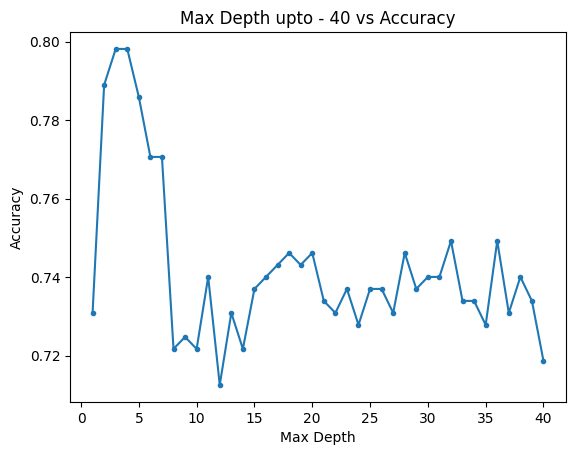

In [85]:
result = classifierHelper(X_train, y_train, X_test, y_test, 40)
plt.plot(result[0], result[1], ".-")
plt.title(f"Max Depth upto - {40} vs Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()